Why is it called linear for Polynomial "Linear" Regression?

It is because we are talking about the coefficients in the function, and if the function can be expressed as a linear combination of coefficients

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [7]:
# Returns dataframes vs np.arrays both are okay for ML modelling
demo_X = df.iloc[:,:-1]
demo_y = df.iloc[: -1]
print(type(demo_X), type(demo_y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [16]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

we do not split in this case as we want to leverage the entire dataset to train the model 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [21]:
lm.fit(X,y)

LinearRegression()

In [22]:
lm.coef_

array([80878.78787879])

Building Polynomial Regression model



We're gonna first create the matrix of features containing these features at different powers,
and then we'll integrate that into a linear regression model, because indeed, this is a linear combination of these powered features.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_features = PolynomialFeatures(degree= 2)
X_poly = poly_reg_features.fit_transform(X)

In [24]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_poly,y)

LinearRegression()

In [25]:
lm2.coef_

array([      0.        , -132871.21212121,   19431.81818182])

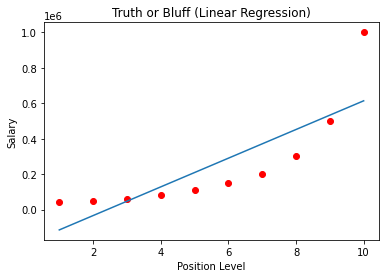

In [31]:
# Visualising the simple Linear Regression results
plt.scatter(X,y, color='r')
plt.plot(X,lm.predict(X))
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

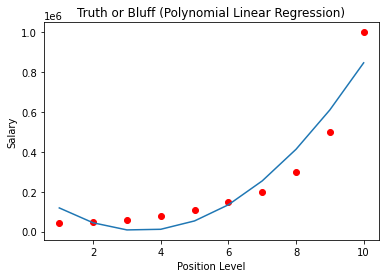

In [35]:
# Visualising the Polynomial Linear Regression results
plt.scatter(X, y, color='r')
plt.plot(X, lm2.predict(poly_reg_features.fit_transform(X)))
plt.title("Truth or Bluff (Polynomial Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Predicting a new result with Linear Regression

Model with degree = 4 as parameter

In [46]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_features = PolynomialFeatures(degree= 4)
X_poly4 = poly_reg_features.fit_transform(X)
from sklearn.linear_model import LinearRegression
lm4 = LinearRegression()
lm4.fit(X_poly4,y)

LinearRegression()

In [51]:
X_poly4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

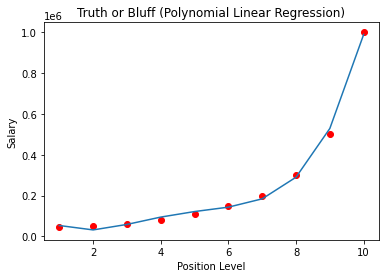

In [47]:
# Visualising the Polynomial Linear Regression results
plt.scatter(X, y, color='r')
plt.plot(X, lm4.predict(poly_reg_features.fit_transform(X)))
plt.title("Truth or Bluff (Polynomial Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

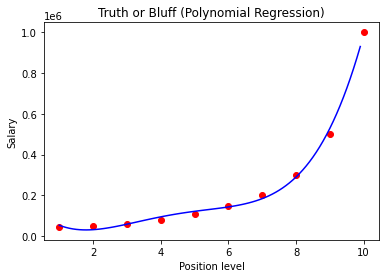

In [48]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lm4.predict(poly_reg_features.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [36]:
lm.predict([[6.5]])

array([330378.78787879])

Predicting a new result with Polynomial Regression

In [43]:
lm2.predict(poly_reg_features.fit_transform([[6.5]]))

array([189498.10606061])

In [42]:
lm2.predict([[0,6.5,6.5**2]])

array([189498.10606061])

In [50]:
lm4.predict(poly_reg_features.fit_transform([[6.5]]))

array([158862.45265155])